Loading package / other files

In [1085]:
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import data_managment as dm
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans,DBSCAN
import sklearn.model_selection
from sklearn.tree import DecisionTreeClassifier

In [1086]:
data=pd.read_csv("data.txt", sep="\t")
dat=data.drop(columns=["Country Code","Series Code","Country Name"])
d=data["2016 [YR2016]"]
l=[]
i=0
while i<len(d):
    j=d.to_list()[i:i+13]
    l.append(j)
    i+=13

q=pd.DataFrame(l)
df = dm.build_adapted_df(data)
imputer = KNNImputer(missing_values=np.nan)
imputed_DF = pd.DataFrame(imputer.fit_transform(df))
imputed_DF.columns = df.columns
imputed_DF.index = df.index
new_df=imputed_DF
df = new_df.transpose(); df

Series Name,"Adolescents out of school, male (% of male lower secondary school age)",Adults (ages 15+) and children (ages 0-14) newly infected with HIV,CO2 emissions (kt),CO2 emissions from gaseous fuel consumption (kt),"CPIA transparency, accountability, and corruption in the public sector rating (1=low to 6=high)",Child employment in manufacturing (% of economically active children ages 7-14),"Child employment in manufacturing, female (% of female economically active children ages 7-14)","Child employment in manufacturing, male (% of male economically active children ages 7-14)",Military expenditure (% of general government expenditure),Oil rents (% of GDP),People practicing open defecation (% of population)
Country Name,,,,,,,,,,,
Afghanistan,203.864828,1000.000000,5300.000191,319.029000,2.000000,267.270628,267.270628,267.270628,3.680251,0.000867,13.643023
Albania,5.903310,100.000000,4480.000019,161.348000,34.455088,22.185488,22.185488,22.185488,3.787234,1.156511,0.080386
Algeria,16133.548802,1900.000000,154910.003662,78741.491000,16133.548802,16133.548802,16133.548802,16133.548802,15.324398,10.028258,0.900352
American Samoa,0.351944,0.351944,0.351944,0.351944,0.351944,0.351944,0.351944,0.351944,0.351944,0.000000,0.703887
Andorra,156.666666,156.666666,469.999999,0.000000,156.666666,156.666666,156.666666,156.666666,156.666666,156.666666,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
Virgin Islands (U.S.),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
West Bank and Gaza,9.226390,2.354196,2.354196,0.000000,2.354196,2.354196,2.354196,2.354196,2.354196,0.000000,0.190396
"Yemen, Rep.",22.633860,870.000000,10850.000381,986.423000,1.500000,378.789575,378.789575,378.789575,181.804975,0.681566,14.209447


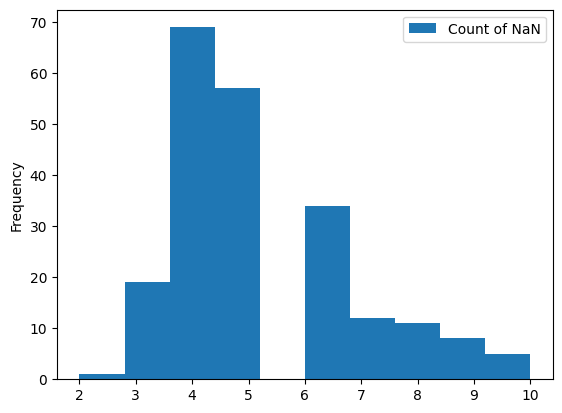

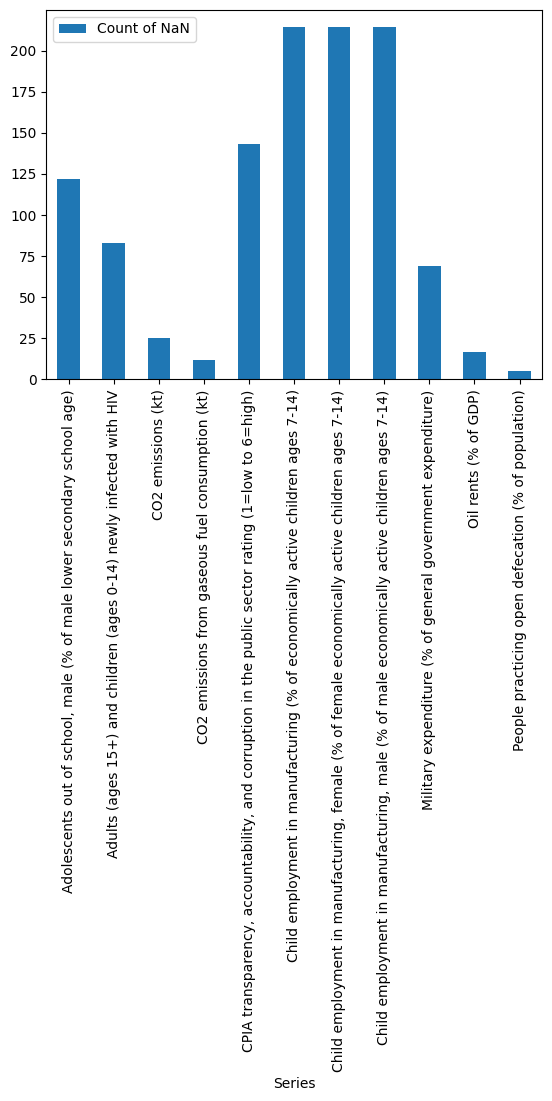

In [1087]:


#df.drop("Country Name", axis = 1)
importlib.reload(dm)
originial_df = pd.read_csv("data.txt", sep="\t")
df = dm.build_adapted_df(originial_df);df
importlib.reload(dm)

df_nb_nan = dm.make_na_count(df)
df_nb_nan["Series"] = df_nb_nan.index
df_nb_nan.plot.hist(y="NaN_count",  label="Count of NaN")
max_nan = df.shape[0]*0.7

importlib.reload(dm)

df_step1_clean = dm.del_many_na_country(df, df_nb_nan, max_nan)
importlib.reload(dm)

df_nb_nan_s = dm.make_na_count(df,False)
df_nb_nan_s["Series"] = df_nb_nan_s.index 
df_nb_nan_s.plot.bar(y="NaN_count", x = "Series",  label="Count of NaN")
max_nan_s = df.shape[1]*0.5

importlib.reload(dm)

df_step2_clean = dm.del_many_na_country(df, df_nb_nan_s, max_nan_s, True)
df_corr = df_step2_clean.T.corr("spearman")

importlib.reload(dm)
df_step3_clean = dm.def_correled_series(df_step2_clean, df_corr,0.8)
df_corr_clean = df_step3_clean.T.corr("spearman")
importlib.reload(dm)

[sum(df.isnull().sum()) ,sum(df_step1_clean.isnull().sum())
,sum(df_step2_clean.isnull().sum()) 
,sum(df_step3_clean.isnull().sum())]  # Evolution of NaN Value TODO: Graphique evolution

df_step4_clean = dm.replace_nan_knn(df_step3_clean)
df_step4_clean
df=df_step4_clean



In [1088]:
# originial_df = pd.read_csv("clean_dataframe.csv", sep="\t")
# df = dm.build_adapted_df(originial_df)
# df=df.transpose()
# df.columns

## Classification

In [1089]:
df1= pd.read_csv("clean_dataframe.csv", sep=",")
df=df1.drop(columns=["Country Name"],axis=1)
df

,Adults (ages 15+) and children (ages 0-14) newly infected with HIV,CO2 emissions (kt),Military expenditure (% of general government expenditure),Oil rents (% of GDP),People practicing open defecation (% of population)
0,-0.149101,-0.187958,-0.177447,-0.084994,-0.069642
1,-0.154316,-0.189018,-0.177433,-0.084773,-0.073874
2,-0.143887,0.005300,-0.175900,-0.083076,-0.073618
3,-0.154894,-0.194804,-0.177889,-0.084994,-0.073679
4,-0.153534,-0.194197,-0.146722,-0.040052,-0.073899
...,...,...,...,...,...
211,-0.154896,-0.194805,-0.177936,-0.084994,-0.073899
212,-0.154895,-0.194804,-0.177923,-0.084994,-0.073840
213,-0.149855,-0.180789,0.211739,-0.084863,-0.069465
214,0.198556,-0.187932,-0.177142,-0.084994,-0.069438


In [1090]:
mean=np.mean(df["CO2 emissions (kt)"]) #pour savoir la moyenne de la colonne CO2 emissions (kt)
std=np.std(df["CO2 emissions (kt)"]) #pour savoir l'écart type de la colonne CO2 emissions (kt)


In [1091]:
#permet de classer le taux de C02 en 3 classes : faible, normal, élevé
C02=[]
compteur=[0,0,0]
for i in df["CO2 emissions (kt)"]:
    if i>-0.16:
        compteur[2]+=1
        C02.append("élevé")
    elif i<-0.192:
        compteur[0]+=1
        C02.append("faible")
    else:
        compteur[1]+=1
        C02.append("normal")
print(compteur)
print(C02)

y=df["CO2 emissions (kt)"]
for i in range(0,len(y)):
    if y[i]>-0.16:
        y[i]="élevé"
    elif y[i]<-0.192:
        y[i]="faible"
    else:
        y[i]="normal"
df

[72, 69, 75]
['normal', 'normal', 'élevé', 'faible', 'faible', 'élevé', 'faible', 'élevé', 'normal', 'faible', 'élevé', 'élevé', 'élevé', 'faible', 'élevé', 'élevé', 'faible', 'élevé', 'élevé', 'faible', 'normal', 'faible', 'faible', 'normal', 'normal', 'normal', 'élevé', 'faible', 'normal', 'élevé', 'normal', 'faible', 'faible', 'normal', 'normal', 'élevé', 'faible', 'faible', 'normal', 'faible', 'élevé', 'élevé', 'élevé', 'faible', 'normal', 'normal', 'normal', 'normal', 'normal', 'élevé', 'faible', 'normal', 'élevé', 'élevé', 'faible', 'faible', 'normal', 'élevé', 'élevé', 'normal', 'normal', 'faible', 'normal', 'faible', 'normal', 'faible', 'faible', 'élevé', 'élevé', 'faible', 'normal', 'faible', 'normal', 'élevé', 'normal', 'faible', 'élevé', 'faible', 'faible', 'faible', 'normal', 'normal', 'faible', 'normal', 'normal', 'normal', 'faible', 'élevé', 'faible', 'élevé', 'élevé', 'élevé', 'élevé', 'élevé', 'élevé', 'élevé', 'normal', 'élevé', 'normal', 'élevé', 'normal', 'faible', '

,Adults (ages 15+) and children (ages 0-14) newly infected with HIV,CO2 emissions (kt),Military expenditure (% of general government expenditure),Oil rents (% of GDP),People practicing open defecation (% of population)
0,-0.149101,normal,-0.177447,-0.084994,-0.069642
1,-0.154316,normal,-0.177433,-0.084773,-0.073874
2,-0.143887,élevé,-0.175900,-0.083076,-0.073618
3,-0.154894,faible,-0.177889,-0.084994,-0.073679
4,-0.153534,faible,-0.146722,-0.040052,-0.073899
...,...,...,...,...,...
211,-0.154896,faible,-0.177936,-0.084994,-0.073899
212,-0.154895,faible,-0.177923,-0.084994,-0.073840
213,-0.149855,normal,0.211739,-0.084863,-0.069465
214,0.198556,normal,-0.177142,-0.084994,-0.069438


In [1092]:
df_final=df.drop(columns=["CO2 emissions (kt)"],axis=1)
dfC02=df["CO2 emissions (kt)"]
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(df_final,C02, test_size=0.3, train_size=0.7,shuffle=True,stratify=C02)

In [1093]:
dt = DecisionTreeClassifier(random_state=5)

+ __Fit__ the Decision Tree using the __training set__

In [1094]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=5)

+ Use the DecisionTree to __predict__ the class membership of the __test set instances__

In [1095]:
y_predict = dt.predict(x_test)

+ Compute the model's __F1__ score

In [1096]:
from sklearn.metrics import f1_score
f1_score(y_test,y_predict,average="weighted"), f1_score(y_test,y_predict,average="macro")

(0.6624439824439824, 0.658958958958959)

+ Compute the model's __accuracy__

In [1097]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.676923076923077

+ Compute the __precision__ of the model

In [1098]:
from sklearn.metrics import precision_score
precision_score(y_test,y_predict,average="weighted"), precision_score(y_test,y_predict,average="macro")

(0.6573449961409827, 0.6549609810479375)

In [1099]:


# tree=sklearn.tree.DecisionTreeClassifier(random_state=48)
# y_predict = dt.predict(x_test)
# pd.crosstab(y_test,y_predict)
# from sklearn.metrics import accuracy_score
# accuracy_score(y_test,y_predict)
# from sklearn.metrics import precision_score
# precision_score(y_test,y_predict,average="weighted"), precision_score(y_test,y_predict,average="macro")
# from sklearn.metrics import recall_score
# recall_score(y_test,y_predict,average="weighted"), recall_score(y_test,y_predict,average="macro")
# from sklearn.metrics import f1_score
# f1_score(y_test,y_predict,average="weighted"), f1_score(y_test,y_predict,average="macro")
# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_predict))


Arbre de decision

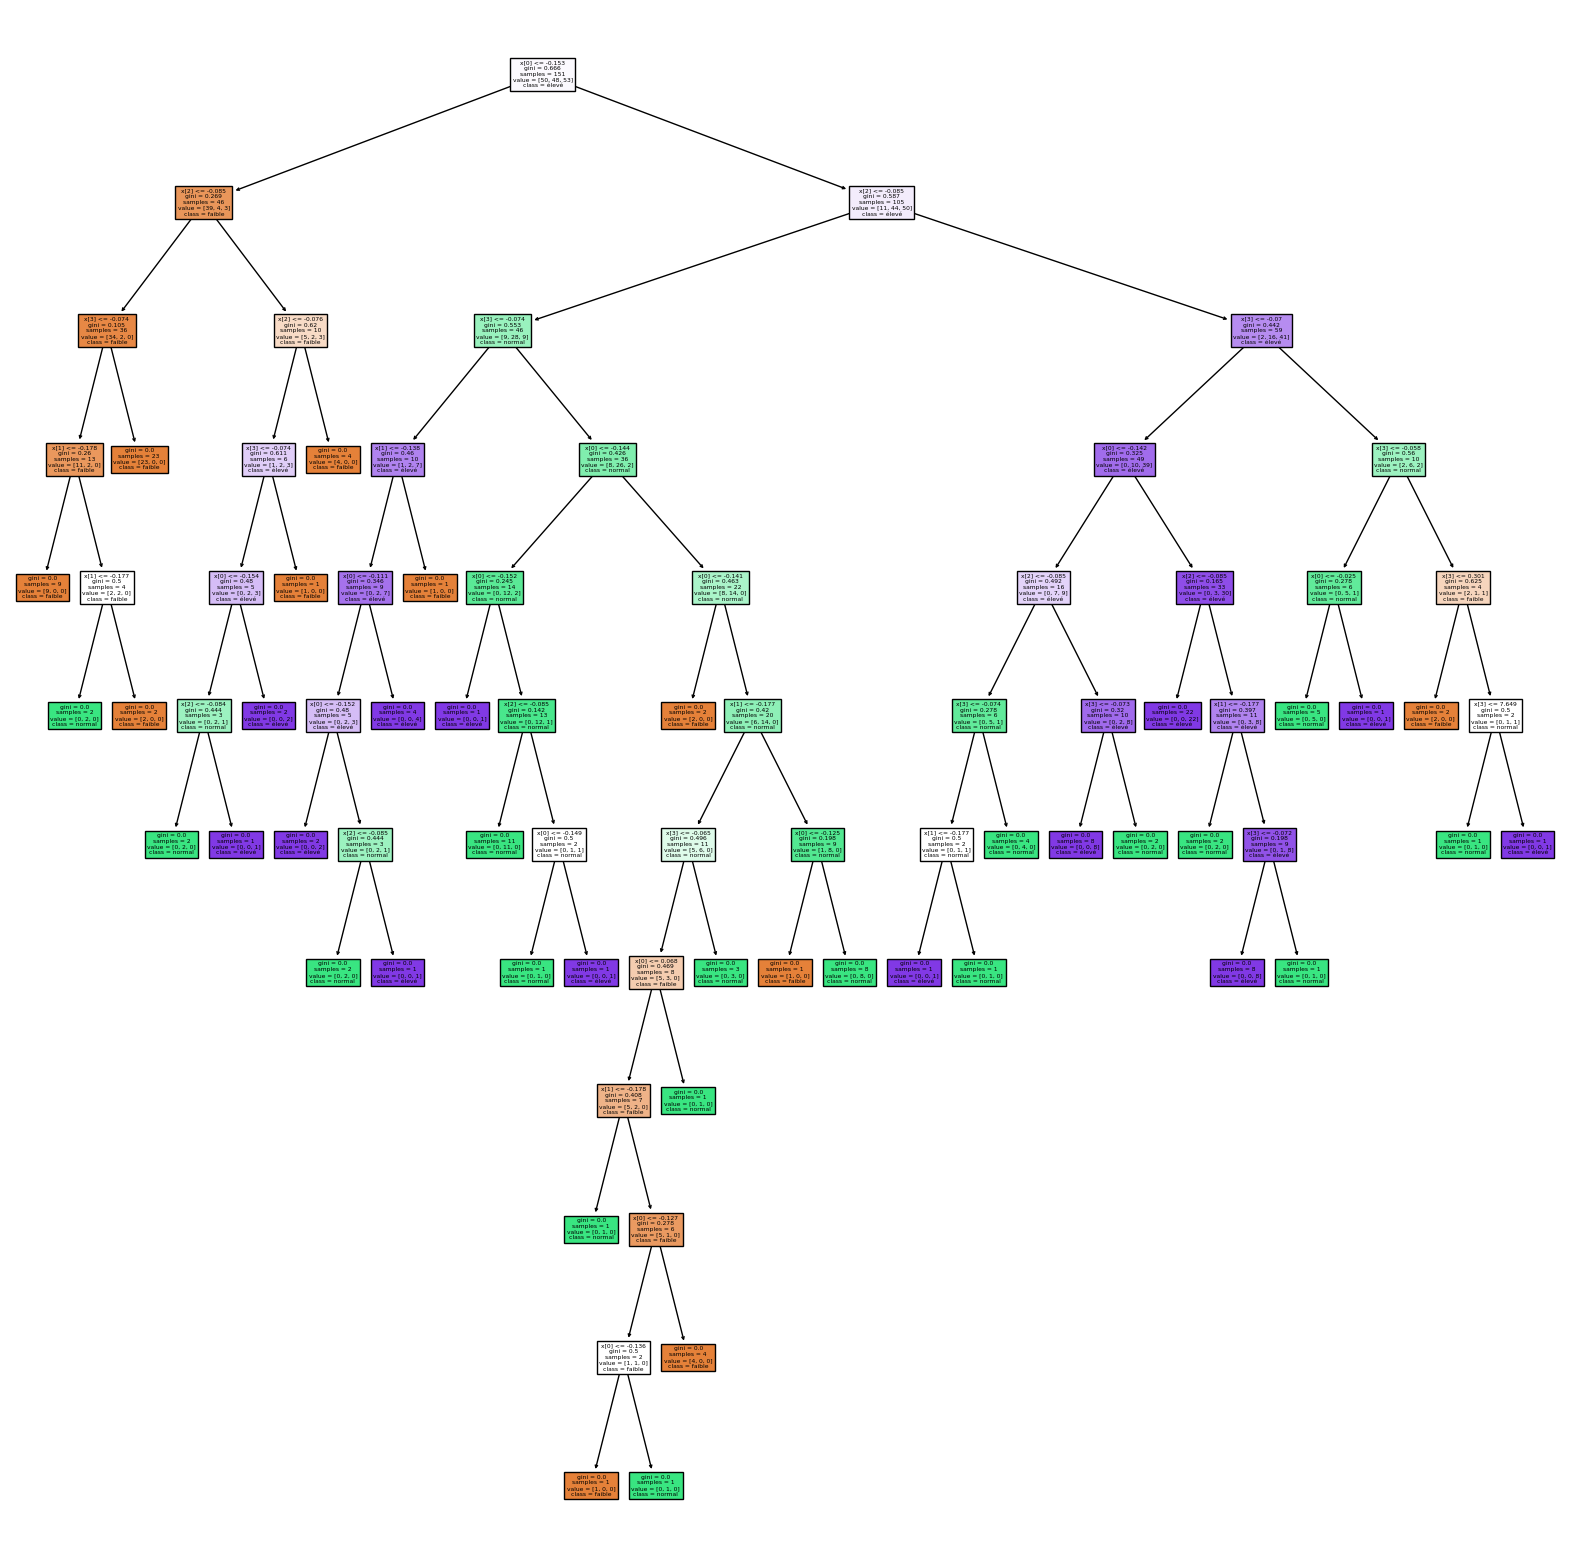

In [1100]:
plt.figure(figsize=(20,20))
try:
    from sklearn.tree import plot_tree

    _=plot_tree(dt,filled=True,class_names=["faible","normal","élevé"])
except ImportError:
    pass

+ Train a $K$-NN model with default parameters, using the raw dataset and another using the normalized dataset
+ Compare their results using an appropriate procedure and suitable measures+ Compare their performances 

In [1101]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import cross_validate 

cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
X=df_final
scoring = ['accuracy',
           'precision_weighted',
           'recall_weighted',
           'f1_weighted']

knn = KNeighborsClassifier()
scores = cross_validate(knn, X, y, scoring=scoring,cv=cv, return_train_score=True)
scores = pd.DataFrame(scores).mean()



+ Apply a Z-score standardization to the dataset, and create another one.
+ Compute the same previous statistics

In [1102]:
from sklearn.preprocessing import StandardScaler
zscore = StandardScaler().fit(X)
X_z = pd.DataFrame(zscore.transform(X), index=X.index, columns=X.columns)
X_z.describe()

,Adults (ages 15+) and children (ages 0-14) newly infected with HIV,Military expenditure (% of general government expenditure),Oil rents (% of GDP),People practicing open defecation (% of population)
count,2.160000e+02,216.000000,2.160000e+02,2.160000e+02
mean,-8.223874e-18,0.000000,4.111937e-18,-4.111937e-18
std,1.002323e+00,1.002323,1.002323e+00,1.002323e+00
min,-1.548958e-01,-0.177936,-8.499378e-02,-7.389915e-02
25%,-1.541256e-01,-0.177576,-8.499378e-02,-7.389915e-02
50%,-1.485220e-01,-0.177192,-8.499360e-02,-7.372671e-02
75%,-1.031817e-01,-0.175801,-8.490115e-02,-7.115918e-02
max,1.414928e+01,9.855311,1.436065e+01,1.464499e+01


In [1103]:
y

0      normal
1      normal
2       élevé
3      faible
4      faible
        ...  
211    faible
212    faible
213    normal
214    normal
215    normal
Name: CO2 emissions (kt), Length: 216, dtype: object

In [1104]:
knn = KNeighborsClassifier()
scores_knn = cross_validate(knn, X_z, y, scoring=scoring,cv=cv, return_train_score=True)
scores_knn = pd.DataFrame(scores_knn).mean()

<AxesSubplot: >

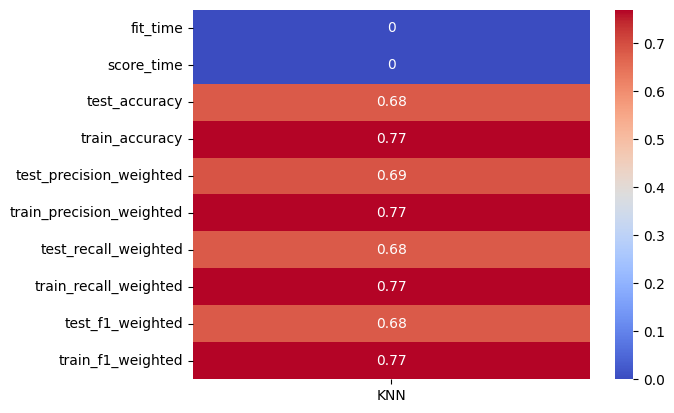

In [1105]:
import seaborn as sns
full_scores = pd.DataFrame({"KNN":scores_knn})
sns.heatmap(full_scores.T.round(2).T,annot=True,cmap='coolwarm')

# Cross-validation

In [1106]:
from sklearn.model_selection import StratifiedKFold #cross-validation splitter
from sklearn.model_selection import cross_validate #cross-validation evaluation of metrics

+ Create a __stratified cross-validation__ splitter 

In [1107]:
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

+ You can also create a __normal cross-validation__ splitter

In [1108]:
# from sklearn.model_selection import KFold
# cv = KFold(n_splits=5, shuffle=True)

+ Define a __list of evaluation metrics__ to assess

In [1109]:
scoring = ['accuracy',
           'precision_macro',
           'precision_weighted',
           'recall_macro',
           'recall_weighted',
           'f1_macro',
           'f1_weighted']

In [1110]:
y

0      normal
1      normal
2       élevé
3      faible
4      faible
        ...  
211    faible
212    faible
213    normal
214    normal
215    normal
Name: CO2 emissions (kt), Length: 216, dtype: object

In [1111]:
scores=[]
X=df_final
scores = cross_validate(dt, X, y, scoring=scoring,
                        cv=cv, return_train_score=True)
sklearn.model_selection.cross_validate(dt, X, y)
                                      

{'fit_time': array([0.00200009, 0.00100875, 0.00099969, 0.00100017, 0.00200152]),
 'score_time': array([0.        , 0.00099182, 0.0010004 , 0.0010004 , 0.00099945]),
 'test_score': array([0.63636364, 0.62790698, 0.62790698, 0.6744186 , 0.72093023])}

## Overfitting

In [1112]:
# Test several maximum numbers of leaves
cv = StratifiedKFold(n_splits=20, random_state=0, shuffle=True)
results = {}
for leaves in range(2,50):
    dt = DecisionTreeClassifier(max_leaf_nodes=leaves,criterion="entropy")
    
    local_results = cross_validate(dt, X, y, scoring=["accuracy"],cv=cv, return_train_score=True)
    avg_local_results = pd.DataFrame(local_results).mean()
    results[leaves] = avg_local_results
results_df = pd.DataFrame(results)

Text(0.5, 0, 'Max Nb. Leaves (more complexe models on the right)')

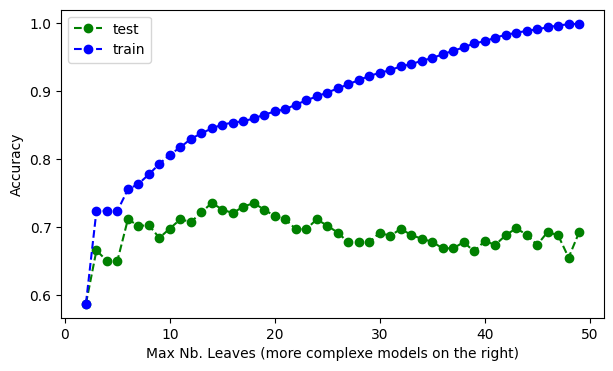

In [1113]:
plt.figure(figsize=(7, 4))
plt.plot(results_df.T.index,
         results_df.T["test_accuracy"], "go--", label="test")
plt.plot(results_df.T.index,
         results_df.T["train_accuracy"],"bo--", label="train")
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("Max Nb. Leaves (more complexe models on the right)")

A partir d'ici ne pas prendre en compte 

AttributeError: module 'data_managment' has no attribute 'compute_max_nan'

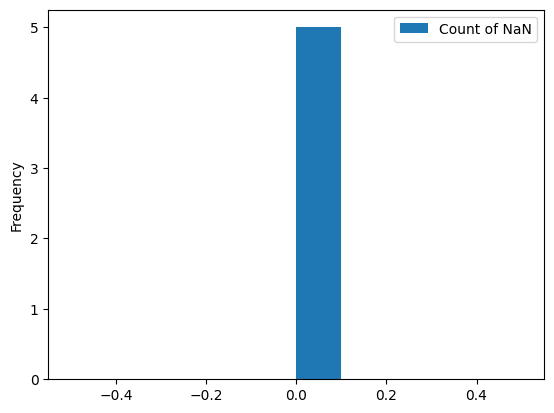

In [1114]:
importlib.reload(dm)

df_nb_nan = dm.make_na_count(df)
df_nb_nan.plot.hist(y="NaN_count",  label="Count of NaN")
median = dm.compute_max_nan(df_nb_nan,0.5)
plt.axvline(median, color='r', linestyle='dashed', linewidth=2, label="Median")
plt.legend(loc='upper right')

On s'intéresse à la partie gauche du graphique (avec le moins de NaN possible). On voit qu'en à 50% des données (la médiane) on obtient une quantité de NaN de 5, ce qui est acceptable pour la quantité de données. On supprime ensuite les pays correspondans à la partie gauche du graphique.

In [ ]:
importlib.reload(dm)

df_step1_clean = dm.del_many_na_country(df, df_nb_nan, median)
print(df_step1_clean)

NameError: name 'median' is not defined

Construct a label by discretisation of an attribute (this label can be built by clustering the values of this attribute). Use this label as class label

In [ ]:
import pandas as pd

df = pd.DataFrame({'attribute': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

# Discretize the attribute into 3 bins
df['label'] = pd.cut(df['attribute'], bins=3, labels=['low', 'medium', 'high'])

# View the resulting dataframe
print(df)
df=df_step1_clean

   attribute   label
0          1     low
1          2     low
2          3     low
3          4     low
4          5  medium
5          6  medium
6          7  medium
7          8    high
8          9    high
9         10    high


NameError: name 'df_step1_clean' is not defined

In [ ]:
df=df_step1_clean
df=df.iloc[1]
import pandas as pd

df = pd.DataFrame({'attribute': df})

# Discretize the attribute into 3 bins
df['label'] = pd.cut(df['attribute'], bins=3, labels=['low', 'medium', 'high'])

# View the resulting dataframe
print(df)
df=df_step1_clean


              attribute label
Country Name                 
Afghanistan      1000.0   low
Albania           100.0   low
Algeria          1900.0   low
Angola          23000.0   low
Argentina        5500.0   low
...                 ...   ...
Uzbekistan       4300.0   low
Vietnam          9400.0   low
Yemen, Rep.       870.0   low
Zambia          61000.0   low
Zimbabwe        44000.0   low

[146 rows x 2 columns]


In [ ]:
import pandas as pds
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
#classes = df_step1_clean
a=df_step1_clean.columns
objects=df_step1_clean
classes=[]
for i in range(len(a)):
    classes.append(a[i])
df = pd.DataFrame(classes, columns = ['Name'])
print(df)
# objects = df.drop(['species'],axis=1)
km=KMeans(n_clusters=3) # create a KMeans object



objects.fillna(0, inplace=True) #rajouter des 0 a la place des NAN
km.fit(objects) # compute the clusters
centroids=km.cluster_centers_ # get the cluster centers
print(centroids)


            Name
0    Afghanistan
1        Albania
2        Algeria
3         Angola
4      Argentina
..           ...
141   Uzbekistan
142      Vietnam
143  Yemen, Rep.
144       Zambia
145     Zimbabwe

[146 rows x 1 columns]
[[1.13258238e+02 1.23252712e+01 2.14028112e+02 2.56043914e+03
  6.11402669e+02 2.54554545e+00 1.01874260e+02 1.68303711e-01
  5.87359721e+01 1.38926619e+01 1.50775403e+02 2.25691825e+02
  4.76156395e-01 2.40732585e+01 3.29174024e+02 1.39267976e+01
  1.81302968e+02 1.27398055e+00 1.11350235e+03 5.33428626e+03
  5.67285259e+01 2.89304856e+02 2.46063478e+02 2.66475532e+01
  1.60368070e+02 2.67209938e+03 4.71057825e+02 6.27508430e+02
  3.90103940e+02 1.00272885e+03 1.14546337e+01 3.44683090e+03
  1.11512886e+03 1.06478664e+02 1.56325684e+03 1.15087769e+01
  2.11452887e+02 1.17933346e+01 2.26582161e+01 2.43822386e+01
  4.34572281e+02 2.90281893e+02 1.43635276e+00 1.22827019e+02
  5.35487272e+02 1.89282637e+03 2.26749399e+01 3.59694272e-01
  6.89444905e+02 2.24230741e

C:\Users\supqu\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

# Chargement des données
data = pd.read_csv("mon_fichier.csv")

# Sélection de l'attribut à discrétiser
attribute = data['ma_colonne']

# Initialisation de l'algorithme de clustering K-means
kmeans = KMeans(n_clusters=3)

# Entraînement de l'algorithme sur l'attribut sélectionné
kmeans.fit(attribute.values.reshape(-1, 1))

# Récupération des labels de chaque valeur de l'attribut
labels = kmeans.labels_

# Ajout des labels comme colonne de classe dans les données
data['class_label'] = labels

# Affiche les données avec la nouvelle colonne de classe
print(data)


FileNotFoundError: [Errno 2] No such file or directory: 'mon_fichier.csv'

In [ ]:
# ##########################autre en plus
# from sklearn.preprocessing import KBinsDiscretizer
# from sklearn.cluster import KMeans
# discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal',strategy='uniform')
# #'ordinal': les données sont encodées comme des entiers, où chaque bin est assigné à un entier unique.
# #'onehot': les données sont encodées sous forme de vecteur de taille n_bins, avec une valeur de 1 dans le bin correspondant et 0 dans les autres.
# #'binary': les données sont encodées comme des nombres binaires, avec une valeur de 1 dans le bin correspondant et -1 dans les autres.
# print(discretizer)
# #avec un data numerique
# data= [[-2, 1, -4,   -1], [-1, 2, -3, -0.5],[ 0, 3, -2,  0.5],[ 1, 4, -1,    2]]
# a=discretizer.fit(data)# compute the clusters
# print(a)
# from sklearn.preprocessing import KBinsDiscretizer
# from sklearn.cluster import KMeans
# discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal',strategy='uniform')
# #'ordinal': les données sont encodées comme des entiers, où chaque bin est assigné à un entier unique.
# #'onehot': les données sont encodées sous forme de vecteur de taille n_bins, avec une valeur de 1 dans le bin correspondant et 0 dans les autres.
# #'binary': les données sont encodées comme des nombres binaires, avec une valeur de 1 dans le bin correspondant et -1 dans les autres.
# print(discretizer)
# #avec un data numerique
# data= [[-2, 1, -4,   -1], [-1, 2, -3, -0.5],[ 0, 3, -2,  0.5],[ 1, 4, -1,    2]]
# a=discretizer.fit(data)# compute the clusters
# print(a)
# objects = discretizer.transform(data)
# print(objects)
# km=KMeans(n_clusters=3) # create a KMeans object

# labels = km.predict()
# #labels = kmeans.fit_predict(X_binned)
# from sklearn.cluster import KMeans
# # réc
# objects=df.iloc[0]
# print(objects)

# # Créez une instance de la classe KMeans avec le nombre de clusters souhaité, ici on prend 3.
# km = KMeans(n_clusters=3)


# km.fit(objects) # calcul le cluster
# centroids=km.cluster_centers_ # get the cluster centers
# print(centroids)


# # # Fit the model to the attribute data
# # kmeans.fit(df[['attribute']])

# # # Add the cluster labels as a new column
# # df['label'] = kmeans.labels_

# # # Assign the label column as the class label
# # df['class'] = df['label']




# #############################fichier classification.py en copier coller
# ##############################################
# import pandas as pd

# #data = pd.read_csv("data.txt", sep="\t")
# #valeurmanquante=data.isna()
# #valeurmanquante.sum(axis=0)
# #print(valeurmanquante)
# ##############################################
# #import
# import pandas as pds
# import seaborn as sns
# import numpy as np
# from scipy import stats
# from sklearn.cluster import KMeans
# from sklearn import metrics
# import matplotlib.pyplot as plt
# # #label by discretisation of an attribute
# from sklearn.preprocessing import KBinsDiscretizer
# from sklearn.cluster import KMeans
# # data = pd.read_csv("data.txt", sep="\t")
# # data = data.drop(data.index[-5:])
# # print(data.tail())
# # # on a un tableau de données nommé "data" et je discrétiser la colonne d'indice 0

# # # supposons que vous avez un tableau de données nommé "X"
# # # et que vous souhaitez discrétiser la colonne d'indice 0

# # #centroids=km.cluster_centers_ # get the cluster centers
# # #print(centroids)
# # discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal',strategy='uniform')
# # #'ordinal': les données sont encodées comme des entiers, où chaque bin est assigné à un entier unique.
# # #'onehot': les données sont encodées sous forme de vecteur de taille n_bins, avec une valeur de 1 dans le bin correspondant et 0 dans les autres.
# # #'binary': les données sont encodées comme des nombres binaires, avec une valeur de 1 dans le bin correspondant et -1 dans les autres.
# # print(discretizer)
# # #avec un data numerique
# # data= [[-2, 1, -4,   -1], [-1, 2, -3, -0.5],[ 0, 3, -2,  0.5],[ 1, 4, -1,    2]]
# # a=discretizer.fit(data)# compute the clusters
# # print(a)
# # objects = discretizer.transform(data)
# # print(objects)
# # #objects = discretizer.fit_transform(data[:,0].reshape(-1, 1))

# # km=KMeans(n_clusters=3) # create a KMeans object

# # labels = km.predict()
# # #labels = kmeans.fit_predict(X_binned)

# # from sklearn.linear_model import LogisticRegression

# # # entraînez un modèle de régression logistique en utilisant les étiquettes comme étiquettes de classe
# # clf = LogisticRegression()
# # clf.fit(data, labels)

# #################yanis#############
# ###################################

# import pandas as pd
# import matplotlib.pyplot as plt
# import importlib
# import data_managment as dm

# importlib.reload(dm)
# originial_df = pd.read_csv("data.txt", sep="\t")
# df = dm.build_adapted_df(originial_df);df

# importlib.reload(dm)

# df_nb_nan = dm.make_na_count(df)
# df_nb_nan.plot.hist(y="NaN_count",  label="Count of NaN")
# median = dm.compute_max_nan(df_nb_nan,0.5)
# plt.axvline(median, color='r', linestyle='dashed', linewidth=2, label="Median")
# plt.legend(loc='upper right')

# importlib.reload(dm)

# df_step1_clean = dm.del_many_na_country(df, df_nb_nan, median)
# print(df_step1_clean)

# import pandas as pd
# from sklearn.cluster import KMeans

# # Chargement des données
# data = pd.read_csv("mon_fichier.csv")

# # Sélection de l'attribut à discrétiser
# attribute = data['ma_colonne']

# # Remplacement des valeurs manquantes par 0
# attribute.fillna(0, inplace=True)

# # Initialisation de l'algorithme de clustering K-means
# kmeans = KMeans(n_clusters=3)

# # Entraînement de l'algorithme sur l'attribut sélectionné
# kmeans.fit(attribute.values.reshape(-1, 1))

# # Récupération des labels de chaque valeur de l'attribut
# labels = kmeans.labels_

# # Ajout des labels comme colonne de classe dans les données
# data['class_label'] = labels

# # Affiche les données avec la nouvelle colonne de classe
# print(data)



FileNotFoundError: [Errno 2] No such file or directory: 'mon_fichier.csv'